<a href="https://colab.research.google.com/github/otavioaugusto1/deep-learning/blob/main/Deep_learning_parte_2_como_a_rede_aprende.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Das camadas flatten, ReLU e softmax, o processo chamado das passagens é propagação ou Fowardpropagation.
## Assim também como a volta ocorre da softmax, ReLU até a flatten, onde é chamada de retropropagação ou backpropagation

Imports

In [1]:

import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.models import load_model

Carregando o dataset

In [2]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Exploração dos dados

In [3]:
len(imagens_treino)
imagens_treino.shape
imagens_teste.shape
len(identificacoes_teste)
identificacoes_treino.min()
identificacoes_treino.max()

9

Exibição dos dados

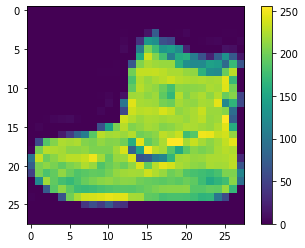

In [4]:
total_de_classificacoes = 10
nomes_de_classificacoes = ['Camiseta', 'Calça', 'Pullover', 
                           'Vestido', 'Casaco', 'Sandália', 'Camisa',
                           'Tênis', 'Bolsa', 'Bota']

plt.imshow(imagens_treino[0])
plt.colorbar()


Normalizando as imagens

In [5]:
imagens_treino = imagens_treino/float(255)


Criando, compilando, treinando e normalizando o modelo

In [6]:
modelo = keras.Sequential([ 
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation=tensorflow.nn.softmax)
])

adam = keras.optimizers.Adam(lr=0.002)

'''lr
learning rate
taxa de aprendizado'''

parando_cedo = [keras.callbacks.EarlyStopping(monitor='val_loss'),
                keras.callbacks.ModelCheckpoint(filepath='melhor_modelo.hdf5',
                                               monitor='val_loss', save_best_only=True)]

modelo.compile(optimizer=adam, 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, 
                       batch_size = 480,
                       epochs=5, validation_split=0.2,
                       callbacks=parando_cedo)

Epoch 1/5
100/100 [==============================] - 1s 14ms/step - loss: 0.6454 - accuracy: 0.7729 - val_loss: 0.4823 - val_accuracy: 0.8234
Epoch 2/5
100/100 [==============================] - 1s 11ms/step - loss: 0.4374 - accuracy: 0.8468 - val_loss: 0.4012 - val_accuracy: 0.8567
Epoch 3/5
100/100 [==============================] - 1s 11ms/step - loss: 0.3899 - accuracy: 0.8589 - val_loss: 0.3781 - val_accuracy: 0.8641
Epoch 4/5
100/100 [==============================] - 1s 11ms/step - loss: 0.3614 - accuracy: 0.8686 - val_loss: 0.3508 - val_accuracy: 0.8745
Epoch 5/5
100/100 [==============================] - 1s 11ms/step - loss: 0.3408 - accuracy: 0.8764 - val_loss: 0.3583 - val_accuracy: 0.8727


Sumário do modelo

In [7]:
sumario_do_modelo = modelo.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


Pesos da primeira camada dense

In [8]:

pesos_camada_dense = modelo.layers[1].get_weights()
pesos_camada_dense

[array([[-0.06540802,  0.02820186,  0.06752578, ...,  0.03949304,
          0.04094477, -0.06948071],
        [-0.12128939, -0.1659258 ,  0.1004952 , ..., -0.02424145,
          0.02764067, -0.05981024],
        [ 0.00468876, -0.17048301,  0.08217442, ..., -0.13230337,
          0.01840641, -0.06761923],
        ...,
        [ 0.09370139, -0.01429746,  0.14538953, ..., -0.03544284,
          0.00056226, -0.06248035],
        [-0.00723399,  0.05871154, -0.02093   , ...,  0.07933903,
          0.07679198, -0.0541622 ],
        [ 0.05592218,  0.03583457,  0.08552987, ...,  0.04173964,
         -0.03515823, -0.05441745]], dtype=float32),
 array([ 1.40547365e-01, -4.56190370e-02,  1.99642748e-01,  1.63498983e-01,
        -1.83797404e-02,  1.10563211e-01, -4.74804342e-02, -8.56537558e-03,
         1.13796312e-02, -4.94175628e-02,  1.10823549e-01, -1.97027344e-02,
        -1.46604162e-02, -1.46715594e-02,  1.20931476e-01,  1.13059804e-01,
         1.44042403e-01,  1.77375913e-01, -7.32814297e

In [9]:
modelo.compile(optimizer='adam', 
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3683 - accuracy: 0.8655 - val_loss: 0.3419 - val_accuracy: 0.8778
Epoch 2/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3416 - accuracy: 0.8746 - val_loss: 0.3401 - val_accuracy: 0.8751
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3258 - accuracy: 0.8785 - val_loss: 0.3342 - val_accuracy: 0.8787
Epoch 4/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3107 - accuracy: 0.8857 - val_loss: 0.3352 - val_accuracy: 0.8809
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3013 - accuracy: 0.8873 - val_loss: 0.3322 - val_accuracy: 0.8818


In [10]:
modelo.get_config()


{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None

Salvando o carregando o modelo treinado

In [11]:
modelo.save('modelo.h5')
modelo_salvo = load_model('modelo.h5')

Visualizando as acurácias de treino e validação por épocas 

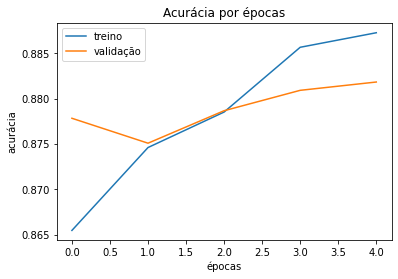

In [12]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('épocas')
plt.ylabel('acurácia')
plt.legend(['treino', 'validação'])


Visualizando as perdas de treino e validação por época

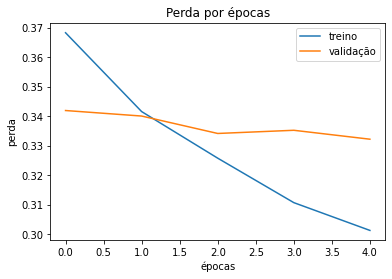

In [13]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('épocas')
plt.ylabel('perda')
plt.legend(['treino', 'validação'])

Testando o modelo e o modelo salvo

In [14]:
testes = modelo.predict(imagens_teste)
print('resultado teste:', np.argmax(testes[1]))
print('número da imagem de teste:', identificacoes_teste[1])

testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print('resultado teste modelo salvo:', np.argmax(testes_modelo_salvo[1]))
print('número da imagem de teste:', identificacoes_teste[1])

resultado teste: 2
número da imagem de teste: 2
resultado teste modelo salvo: 2
número da imagem de teste: 2



Avaliando o modelo

In [15]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print('Perda do teste:', perda_teste)
print('Acurácia do teste:', acuracia_teste)

313/313 [==============================] - 1s 2ms/step - loss: 62.8175 - accuracy: 0.8568
Perda do teste: 62.81751251220703
Acurácia do teste: 0.8568000197410583
